In [1]:
import pandas as pd
import numpy as np

In [164]:
df = pd.read_csv('AAPL.csv')
df.tail

<bound method NDFrame.tail of             Date       Open       High        Low      Close  Adj Close  \
0     2015-05-27  32.584999  33.064999  32.512501  33.009998  30.315250   
1     2015-05-28  32.965000  32.987499  32.775002  32.945000  30.255547   
2     2015-05-29  32.807499  32.862499  32.474998  32.570000  29.911171   
3     2015-06-01  32.570000  32.847500  32.512501  32.634998  29.970865   
4     2015-06-02  32.465000  32.665001  32.330002  32.490002  29.837704   
...          ...        ...        ...        ...        ...        ...   
1253  2020-05-18  78.292503  79.125000  77.580002  78.739998  78.462914   
1254  2020-05-19  78.757500  79.629997  78.252502  78.285004  78.009521   
1255  2020-05-20  79.169998  79.879997  79.129997  79.807503  79.526665   
1256  2020-05-21  79.665001  80.222504  78.967499  79.212502  78.933754   
1257  2020-05-22  78.942497  79.807503  78.837502  79.722504  79.441963   

         Volume  
0     183332800  
1     122933200  
2     203538000

In [142]:
d = df[['Close']]
df_close = df[['Close']].values

df_close.shape
df_close

array([[33.009998],
       [32.945   ],
       [32.57    ],
       ...,
       [79.807503],
       [79.212502],
       [79.722504]])

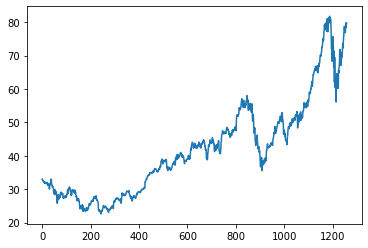

In [75]:
import matplotlib.pyplot as plt
plt.plot(df_close)

In [77]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))
df_close = scaler.fit_transform(df_close)
df_close

#print(df_close)

array([[0.17605334],
       [0.17495568],
       [0.16862282],
       ...,
       [0.96635143],
       [0.95630329],
       [0.964916  ]])

In [86]:
from sklearn.model_selection import train_test_split

#train, test = train_test_split(df_close, test_size = 0.35, shuffle = False)

training_size = int(len(df_close)*0.65)
test_size = len(df_close) - training_size

train_data = df_close[0:training_size, :]
train_data

array([[0.17605334],
       [0.17495568],
       [0.16862282],
       [0.16972048],
       [0.16727185],
       [0.1679473 ],
       [0.16473867],
       [0.16174109],
       [0.15815252],
       [0.15654818],
       [0.16271217],
       [0.16148779],
       [0.1554927 ],
       [0.15443723],
       [0.15730812],
       [0.15604157],
       [0.15849024],
       [0.15308622],
       [0.15735034],
       [0.15490164],
       [0.15946129],
       [0.15688593],
       [0.1537195 ],
       [0.14434688],
       [0.14814659],
       [0.15308622],
       [0.15241073],
       [0.15055308],
       [0.1492443 ],
       [0.13607195],
       [0.12551719],
       [0.1390695 ],
       [0.14911765],
       [0.14890653],
       [0.15401504],
       [0.16115004],
       [0.16583635],
       [0.17618006],
       [0.17060712],
       [0.14725999],
       [0.14700669],
       [0.14422022],
       [0.13691631],
       [0.13949167],
       [0.13784513],
       [0.13522759],
       [0.13071015],
       [0.118

In [97]:
# split data into xtrain and y_train

x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])

In [99]:
#convert the x_train and y_train to numpy arrays

x_train, y_train = np.array(x_train), np.array(y_train)
x_train.shape
x_train

array([[0.17605334, 0.17495568, 0.16862282, ..., 0.11323147, 0.110445  ,
        0.10415438],
       [0.17495568, 0.16862282, 0.16972048, ..., 0.110445  , 0.10415438,
        0.09419067],
       [0.16862282, 0.16972048, 0.16727185, ..., 0.10415438, 0.09419067,
        0.06510178],
       ...,
       [0.41383094, 0.41294431, 0.41475976, ..., 0.50413745, 0.5062062 ,
        0.51920968],
       [0.41294431, 0.41475976, 0.41188883, ..., 0.5062062 , 0.51920968,
        0.53719495],
       [0.41475976, 0.41188883, 0.41020011, ..., 0.51920968, 0.53719495,
        0.52824455]])

In [101]:
#reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1],1))
x_train.shape

(757, 60, 1)

In [105]:
#Build the LSTM model

model = Sequential()
model.add(LSTM(50, return_sequences = True, input_shape = (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences = False))
model.add(Dense(25))
model.add(Dense(1))

In [107]:
#compile the model
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [131]:
#Train the model
model.fit(x_train, y_train, batch_size = 1, epochs = 1)

757/757 [==============================] - 21s 28ms/step - loss: 3.0955e-04


In [132]:
#create  the testing data set
#create a new array containing scaled values
test_data = df_close[training_size - 60:, :]
#Create the data sets x_test and y_tests

x_test = []
y_test = df_close[training_size:, :]

for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

In [133]:
#convert teh data to a numpy array
x_test = np.array(x_test)
x_test = np.reshape(x_test,(x_test.shape[0], x_test.shape[1], 1))
x_test.shape

(441, 60, 1)

In [134]:
#get the models predicted price values
predictions = model.predict(x_test)

predictions = scaler.inverse_transform(predictions)
predictions

array([[53.76975 ],
       [53.848522],
       [53.876488],
       [53.920216],
       [54.087616],
       [54.38756 ],
       [54.907032],
       [55.525883],
       [56.21503 ],
       [56.79409 ],
       [57.05038 ],
       [56.812443],
       [56.30064 ],
       [55.580498],
       [55.389156],
       [55.230145],
       [55.558968],
       [55.798923],
       [55.517723],
       [55.1635  ],
       [54.88468 ],
       [54.840786],
       [54.72857 ],
       [54.876255],
       [55.193913],
       [55.368004],
       [55.79535 ],
       [56.25483 ],
       [56.717945],
       [57.20203 ],
       [57.76166 ],
       [57.86213 ],
       [57.467327],
       [56.933064],
       [56.7042  ],
       [55.837376],
       [54.84889 ],
       [54.657185],
       [54.462967],
       [54.726643],
       [55.03974 ],
       [54.927998],
       [54.955738],
       [55.12378 ],
       [55.46067 ],
       [55.193382],
       [55.136826],
       [54.887558],
       [54.33162 ],
       [53.88843 ],


In [136]:
#Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

55.93632815213103

<ipython-input-154-c7f577a31802>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['predictions'] = predictions


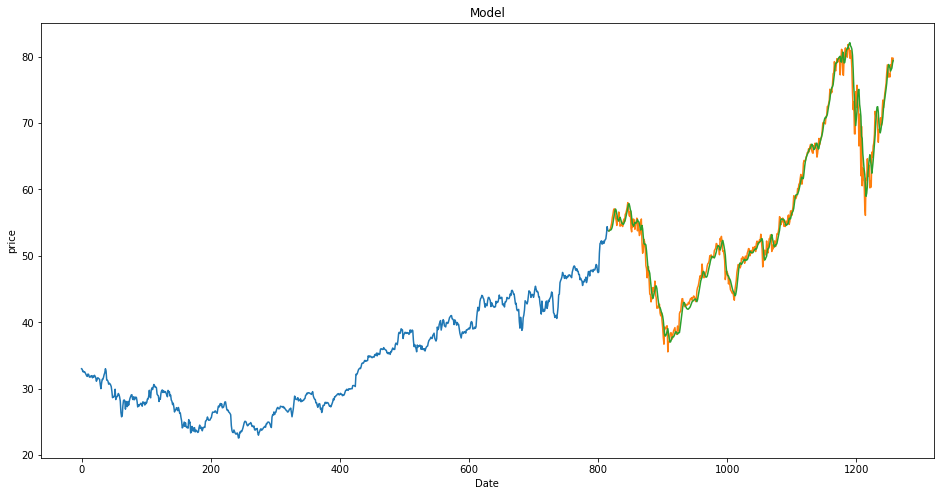

In [154]:
#plot the data
train = d[:training_size]
valid = d[training_size:]
valid['predictions'] = predictions
valid

#visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date')
plt.ylabel('price')
plt.plot(train['Close'])
plt.plot(valid[['Close', 'predictions']])

In [163]:
# predict the next value
new_df = df[['Close']]
new_df

df_c = new_df[-60:].values
df_c

s_df_c = scaler.fit_transform(df_c)
x_new_test = []

x_new_test.append(s_df_c)
x_new_test = np.array(x_new_test)

x_new_test = np.reshape(x_new_test, (x_new_test.shape[0], x_new_test.shape[1], 1))

pred = model.predict(x_new_test)

pred = scaler.inverse_transform(pred)
pred

array([[79.350716]], dtype=float32)